In [27]:
import os
import pandas as pd
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [36]:
image_dir = 'flickr8k/images'
caption_file = 'flickr8k/captions.txt'


class Flickr8kDataset(Dataset):
    def __init__(self, root_dir, captions_file, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            captions_file (string): Path to the txt file with captions.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.df = pd.read_csv(captions_file, delimiter='|')
        self.transform = transform
        self._last_img = (None, None)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.df.iloc[idx, 0])
        if self._last_img[0] == img_name:
            image = self._last_img[1]
        else:
            image = Image.open(img_name).convert('RGB')
            if self.transform:
                image = self.transform(image)
            self._last_img = (img_name, image)

        caption_number = self.df.iloc[idx, 1]
        caption = self.df.iloc[idx, 2]

        return image, caption_number, caption


dataset = Flickr8kDataset(image_dir, caption_file)
print(len(dataset))

40455


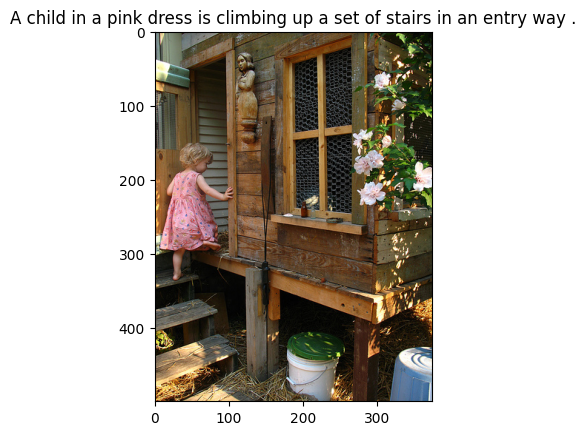

In [37]:
# display the first sample
im = dataset[0][0]
caption = dataset[0][2]

plt.imshow(im)
plt.title(caption)
plt.show()

In [38]:
# analyze the image sizes
sizes = []
for im, idx, _ in tqdm(dataset):
    if idx == 0:
        sizes.append(im.size)

sizes = np.array(sizes)
print(sizes.shape)

100%|██████████| 40455/40455 [00:17<00:00, 2264.73it/s]

(8091, 2)


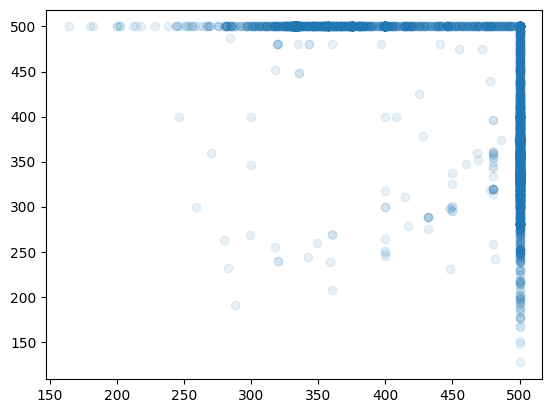

In [39]:
# plot the image sizes
plt.scatter(sizes[:, 0], sizes[:, 1], alpha=0.1)

# Model

In [43]:
# load inception v3
from torchvision import models

inception = models.inception_v3(weights=models.Inception_V3_Weights.IMAGENET1K_V1)
inception.eval()

# save model as h5
import h5py

torch.save(inception, 'inception.h5')